<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml06_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 농어(Perch) 무게 예측

* 농어의 모든 특성들을 사용한 무게 예측
* KNN Regressor vs Linear Regression 비교
* 다항 회귀
* 규제(Regularization)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [5]:
perch = fish[fish.Species == 'Perch']   # Perch(농어) 데이터셋 생성

In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


Weight ~ Length + Diagonal + Height + Width

In [7]:
perch.columns[2:]
# X = perch[['Length', 'Diagonal', 'Height', 'Width']].values
X = perch[perch.columns[2:]].values     # 특성(features) 배열

In [8]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [9]:
y = perch['Weight'].values  # 타겟(target) 배열

In [10]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련 셋/테스트 셋 나누기

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(42, 4)

In [13]:
X_test.shape

(14, 4)

In [14]:
y_train.shape

(42,)

In [15]:
y_test.shape

(14,)

# 1차항만 고려한 회귀

## KNN

In [16]:
knn = KNeighborsRegressor() # ML Model Create

In [17]:
knn.fit(X_train, y_train)   # model training

KNeighborsRegressor()

In [18]:
train_pred = knn.predict(X_train)   # X_train의 예측값  찾기

In [19]:
train_pred[:5]  # 5개만 출력

array([ 87.6, 123. ,  79.6,  70.6, 723. ])

In [20]:
y_train[:5] # 실제값 5개 출력, (농어의 무게)

array([ 85., 135.,  78.,  70., 700.])

In [21]:
test_pred = knn.predict(X_test)     # 테스트 셋 예측값 계산

In [22]:
test_pred[:5]

array([ 60. ,  79.6, 248. , 122. , 130. ])

In [23]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [24]:
print('훈련 셋 MSE:', mean_squared_error(y_train, train_pred))
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 MSE:', mean_squared_error(y_test, test_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 MSE: 2986.5723809523806
훈련 셋 R2: 0.97579760182756
테스트 셋 MSE: 837.3100000000001
테스트 셋 R2: 0.9916579819676246


KNN 모델은 과소적합.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

선형회귀식에서 예측한 값 $\hat{y}$들의 MSE가 최소가 되는 $w_0$ ~ $w_4$를 찾는 과정.

In [25]:
lin_reg = LinearRegression()    # ML Model Create

In [26]:
lin_reg.fit(X_train, y_train)   # ML training

LinearRegression()

In [27]:
lin_reg.coef_       # 기울기 값. 결정계수

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [28]:
lin_reg.intercept_  #

np.float64(-610.0275364260515)

무게 = -610 -40 x Length + 47 x Diagnoal + 67 x Height + 35 x Width

In [29]:
train_pred = lin_reg.predict(X_train)   # 훈련 셋 예측값 계산

In [30]:
test_pred = lin_reg.predict(X_test) # 테스트 셋 예측값 계산

In [31]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9567246116638569
테스트 셋 R2: 0.8790465615990273


Linear Regression은 과대적합.

Linear Regression은 KNN보다 오차가 크다. (성능이 안 좋다.)

# 2차항을 고려한 회귀

## KNN

In [32]:
poly = PolynomialFeatures(include_bias=False)   # 변환기
# degree=2(기본값) : 2차항까지 고려
# interaction_only=False(기본값) : x1^2, ... x4^2, x1 * x2, x1 * x3, ... 모든 2차항들을 고려.
# 만약 interaction_only=True로 설정하면 제곱항들은 무시됨.

In [33]:
scaler = StandardScaler()       # 변환기

In [34]:
knn = KNeighborsRegressor()     # 추정기

In [35]:
pipe = Pipeline(steps=[('poly', poly),
                       ('scaler', scaler),
                       ('knn', knn)])

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [37]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [38]:
train_pred = pipe.predict(X_train)  # train 예측값 생성

In [39]:
train_pred[:5]

array([ 79.6, 130. ,  79.6,  79.6, 666.2])

In [40]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [41]:
test_pred = pipe.predict(X_test)    # test 예측값 생성

In [42]:
test_pred[:5]

array([ 61. ,  79.6, 248. , 122. , 130. ])

In [43]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [44]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9852536214139073
테스트 셋 R2: 0.9861441832656344


1차항만 고려한 KNN과 비교하면 훈련 셋의 점수가 좋아졌고, 과소적합의 크기도 줄어듦.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
 + w_5 \times x_1^2 + w_6 \times x_1 x_2 + \dots + w_{14} \times w_4^2
$$

선형 회귀식 예측값들의 MSE를 최소로 하는 $w_0$ ~ $w_{14}$를 찾는 것.

In [45]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                       ('scaler', StandardScaler()),
                        ('lin_reg', LinearRegression())])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [47]:
# 선형 회귀의 계수들(coefficients)
pipe['lin_reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [48]:
# 선형 회귀의 절편(intercept)
pipe['lin_reg'].intercept_

np.float64(400.833333333325)

In [49]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [50]:
train_pred = pipe.predict(X_train)  # 훈련 셋 예측값

In [51]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [52]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [53]:
test_pred = pipe.predict(X_test)    # 테스트 셋 예측값

In [54]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9920055538341164
테스트 셋 R2: 0.949260960155254


# 규제의 필요성

* 선형 회귀 : Weight ~ Length
* 고차항을 포함하는 선형 회귀 :
    * 1차항 : W ~ L
    * 2차항 : W ~ L + L^2
    * 5차항 : W ~ L + L^2 + L^3 + L^4 + L^5
    * 50차항 : W ~ L + ... + L^50

In [55]:
X = perch[['Length']].values    # 특성(feautres) 배열
y = perch['Weight'].values      # 타겟(target) 배열

In [56]:
# 훈련/테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## degree=1, 1차항

In [57]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [59]:
pipe['reg'].coef_

array([340.55381311])

In [60]:
pipe['reg'].intercept_

np.float64(400.83333333333337)

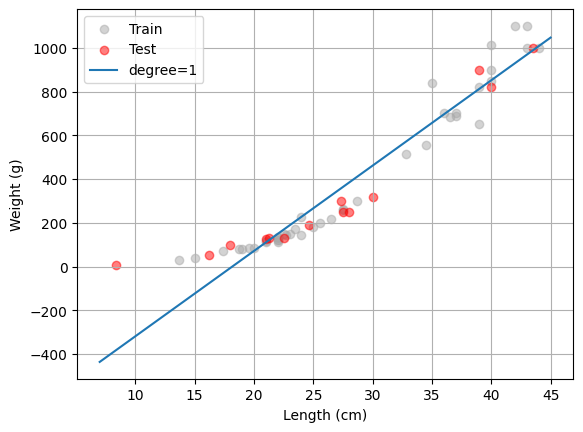

In [61]:
# 훈련 셋 산점도(무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='DarkGray')
# 테스트 셋 산점도(무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='Red')
# 선형 회귀 직선 선그래프
x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)   # y = w0 + w1 * x
plt.plot(x_vals, y_vals, label='degree=1')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

## degree=2, 2차항

In [62]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [63]:
pipe.fit(X_train, y_train)  # training

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [64]:
pipe['reg'].coef_

array([-188.16429447,  532.30423546])

In [65]:
pipe['reg'].intercept_

np.float64(400.83333333333326)

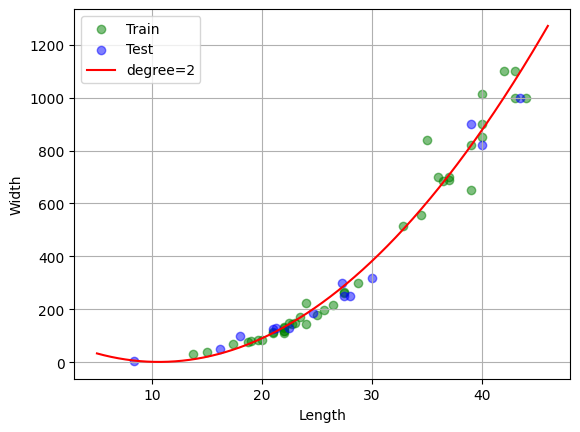

In [66]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='green')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='blue')
# 선형회귀 2차항 선그래프
x_value = np.arange(5, 46, 0.001).reshape((-1, 1))
y_value = pipe.predict(x_value)
plt.plot(x_value, y_value, label='degree=2', color='red')

plt.legend()
plt.grid()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## degree=5, 5차항

In [67]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [69]:
pipe['reg'].coef_

array([ 1090.51349849, -4377.12096334,  5960.80924384, -2038.47216236,
        -298.04297802])

In [70]:
pipe['reg'].intercept_

np.float64(400.8333333333347)

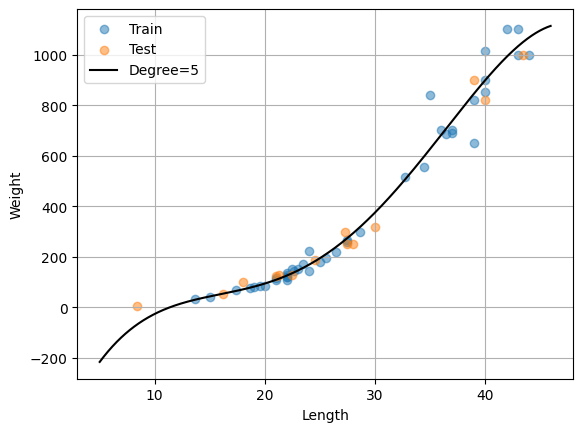

In [71]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# 선형회귀 5차항 선그래프
x_values = np.arange(5, 46, 0.001).reshape((-1, 1))
y_values = pipe.predict(x_values)
plt.plot(x_values, y_values, label='Degree=5', color='black')

plt.grid()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

## degree=50, 50차항

In [72]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [73]:
pipe.fit(X_train, y_train)      # training

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [74]:
pipe['reg'].coef_

array([-1.06655732e+10,  1.31607835e+11, -7.23161507e+11,  2.21914500e+12,
       -3.82903989e+12,  2.83355131e+12,  1.34283568e+12, -2.96056487e+12,
       -1.15588476e+12,  2.47206303e+12,  2.08521405e+12, -1.12369432e+12,
       -2.75528228e+12, -1.19478485e+12,  1.52303149e+12,  2.66920812e+12,
        1.41672749e+12, -9.47446537e+11, -2.50374325e+12, -2.21496901e+12,
       -4.41802170e+11,  1.56357602e+12,  2.57516018e+12,  2.08702650e+12,
        4.67713722e+11, -1.36681656e+12, -2.48471888e+12, -2.38414097e+12,
       -1.16743693e+12,  5.69154142e+11,  2.04400475e+12,  2.63025744e+12,
        2.09946051e+12,  6.87519539e+11, -1.02047640e+12, -2.32799351e+12,
       -2.69616960e+12, -1.95101562e+12, -3.62133469e+11,  1.44020668e+12,
        2.68424495e+12,  2.75434519e+12,  1.48200526e+12, -6.79292434e+11,
       -2.68516349e+12, -3.22616369e+12, -1.39723093e+12,  2.26817999e+12,
        4.41059579e+12, -2.84704294e+12])

In [75]:
pipe['reg'].intercept_

np.float64(400.8355034612611)

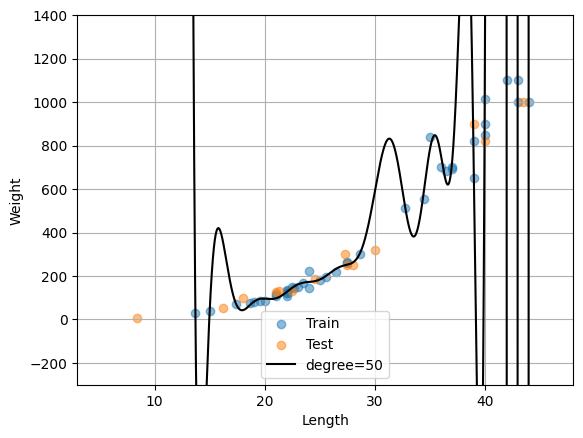

In [76]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# 선형회귀 50차항 선그래프
x_vals = np.arange(5, 46, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)
plt.plot(x_vals, y_vals, label='degree=50', color='black')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.ylim((-300, 1400))
plt.show()

----- degree = 1 -----
훈련 셋 MSE = 7422.953552609778
테스트 셋 MSE = 17590.265977889165
----- degree = 2 -----
훈련 셋 MSE = 3617.9917403639633
테스트 셋 MSE = 2248.9974694392554
----- degree = 5 -----
훈련 셋 MSE = 3216.6113933040733
테스트 셋 MSE = 1753.0984158595472
----- degree = 50 -----
훈련 셋 MSE = 1242.3671485244474
테스트 셋 MSE = 7683897194550.778


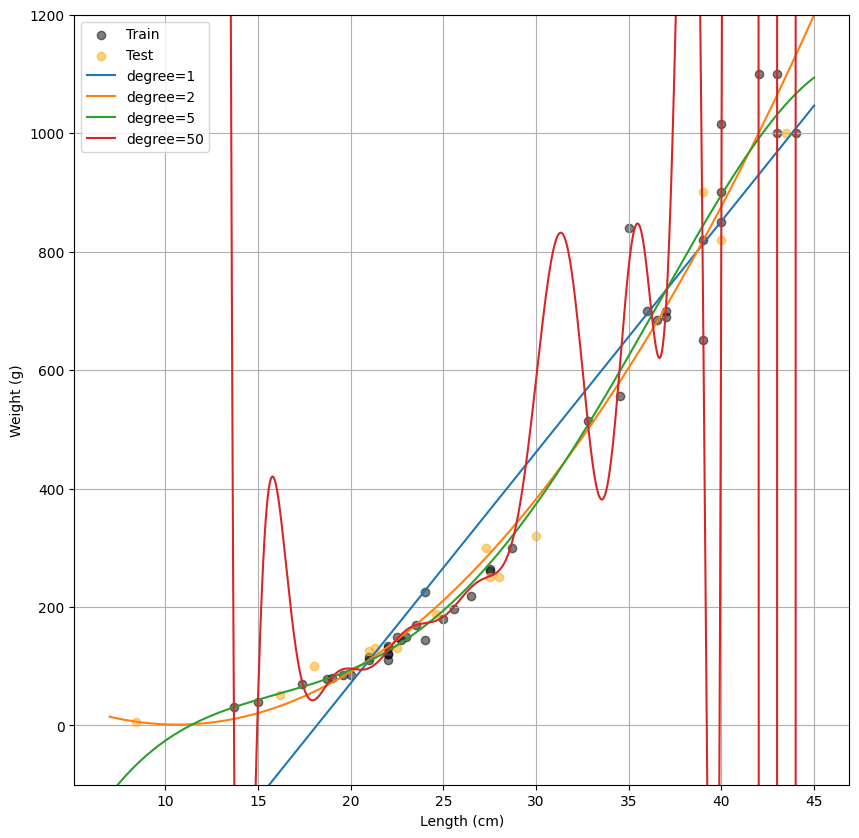

In [77]:
plt.figure(figsize=(10, 10))

# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='black')

# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='orange')

# PolynomialFeatures에서 사용할 degree(차수) 값들
degrees = (1, 2, 5, 50)
for d in degrees:
    # Pipeline 객체 생성
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                           ('scaler', StandardScaler()),
                           ('reg', LinearRegression())])
    # 훈련 셋으로 ML 모델 훈련
    pipe.fit(X_train, y_train)

    # 훈련 셋/테스트 셋 MSE 출력
    print(f'----- degree = {d} -----')
    train_pred = pipe.predict(X_train)
    print('훈련 셋 MSE =', mean_squared_error(y_train, train_pred))
    test_pred = pipe.predict(X_test)
    print('테스트 셋 MSE =', mean_squared_error(y_test, test_pred))

    # 회귀 식을 시각화하기 위해서
    x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))   # 회귀식 시각화를 위한 x좌표들
    y_vals = pipe.predict(x_vals)   # 회귀식 시각화를 위한 y 좌표들
    plt.plot(x_vals, y_vals, label=f'degree={d}')   # 선그래프


plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.ylim((-100, 1200))  # y축을 그릴 범위
plt.show()

# 규제(Regularization)


*   머신 러닝의 목적은 비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.


*   선형 회귀(linear regression)의 목적은 MSE(mean_squared_error)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 비용 함수는 MSE(w).
$$
J(w) = MSE(w)
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2
$$
    *   $N$: 샘플의 개수(DataFrame의 row의 개수)
    *   $m$: 특성의 개수(DataFrame의 column의 개수)
    *   $y_i$: $i$번째 샘플의 실젯값
    *   $\hat{y_i}$: $i$번째 샘플의 예측값
    *   $x_{ij}$: $i$번째 샘플의 $j$번째 특성 값
    *   $w_j$: $j$번째 특성에 곱해주는 계수(기울기)

*   Ridge(`l2`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

*   Lasso(`l1`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.

*   ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고 있음.

*   Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐($ \alpha \ge 0 $).
*   ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 `l1` 규제의 비율($0 \le r \le 1$)을 의미함.

## L2 규제(Ridge)

In [78]:
def visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator):
    plt.figure(figsize=(10, 10))

    plt.scatter(X_train, y_train, color='black', alpha=0.5, label='Train')
    plt.scatter(X_test, y_test, color='orange', alpha=0.5, label='Test')

    for d in degrees:
        pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('reg', estimator)])
        pipe.fit(X_train, y_train)
        train_pred = pipe.predict(X_train)
        test_pred = pipe.predict(X_test)
        print(f'degree={d}: {r2_score(y_train, train_pred)}(Train) / {r2_score(y_test,test_pred)}(Test)')
        x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
        y_vals = pipe.predict(x_vals)
        plt.plot(x_vals, y_vals, label=f'degree={d}')

    plt.grid()
    plt.legend()
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.ylim((-100, 1200))
    plt.show()

degree=1: 0.9393380341955502(Train) / 0.836127969609232(Test)
degree=2: 0.9619389326333372(Train) / 0.9347719209841489(Test)
degree=5: 0.9675257933461249(Train) / 0.9665833996552663(Test)
degree=50: 0.9739229136053733(Train) / 0.9813385255457557(Test)


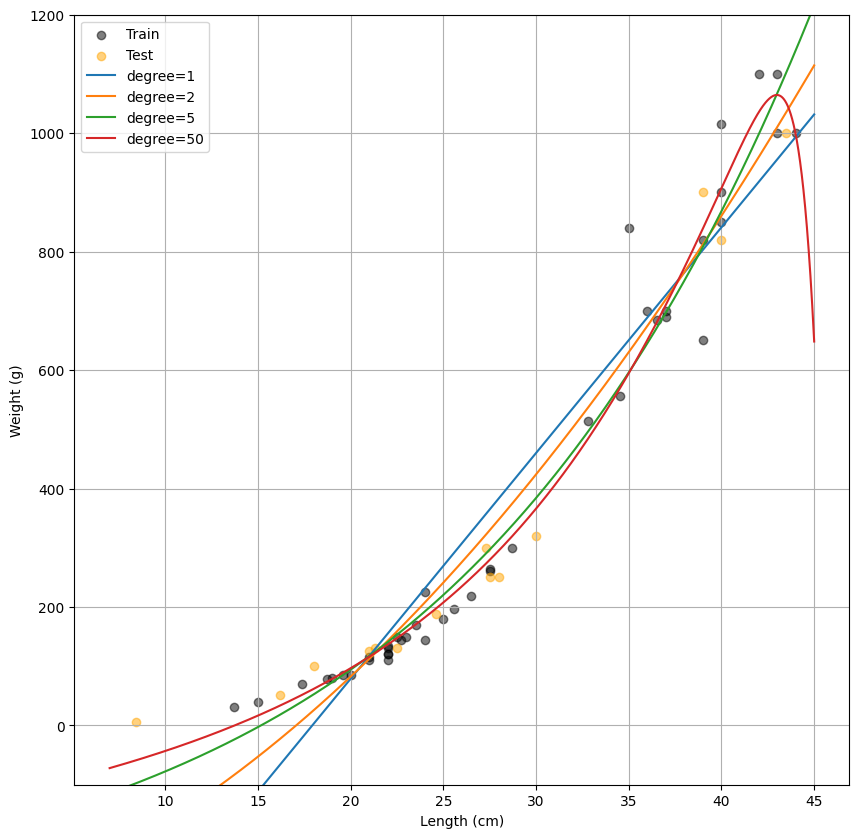

In [79]:
degrees = (1, 2, 5, 50)
estimator = Ridge()     # 비용 함수에 일부러 Error를 더 줘서 훈련세트를 덜 못 맞히게 만듦.
visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator)

## L1 규제(Lasso)

degree=1: 0.9398382302602472(Train) / 0.8262705448946932(Test)
degree=2: 0.9682046094058255(Train) / 0.9632610688126504(Test)
degree=5: 0.9692636157789123(Train) / 0.9718691066691287(Test)
degree=50: 0.9747331384703934(Train) / 0.9827585864116039(Test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.007e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


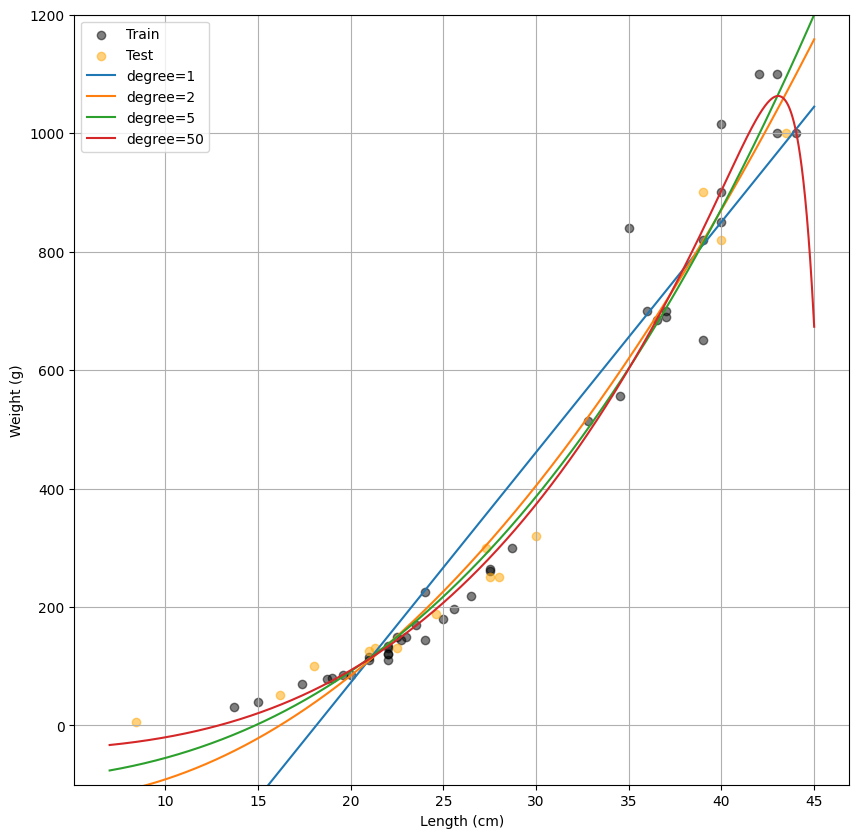

In [80]:
estimator = Lasso()
visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator)

## ElasticNet

degree=1: 0.8348047834365431(Train) / 0.8425462812915511(Test)
degree=2: 0.9179731022680415(Train) / 0.9211902563521128(Test)
degree=5: 0.9574099753809557(Train) / 0.9741613969257316(Test)
degree=50: 0.9610659368865341(Train) / 0.9817137006795826(Test)


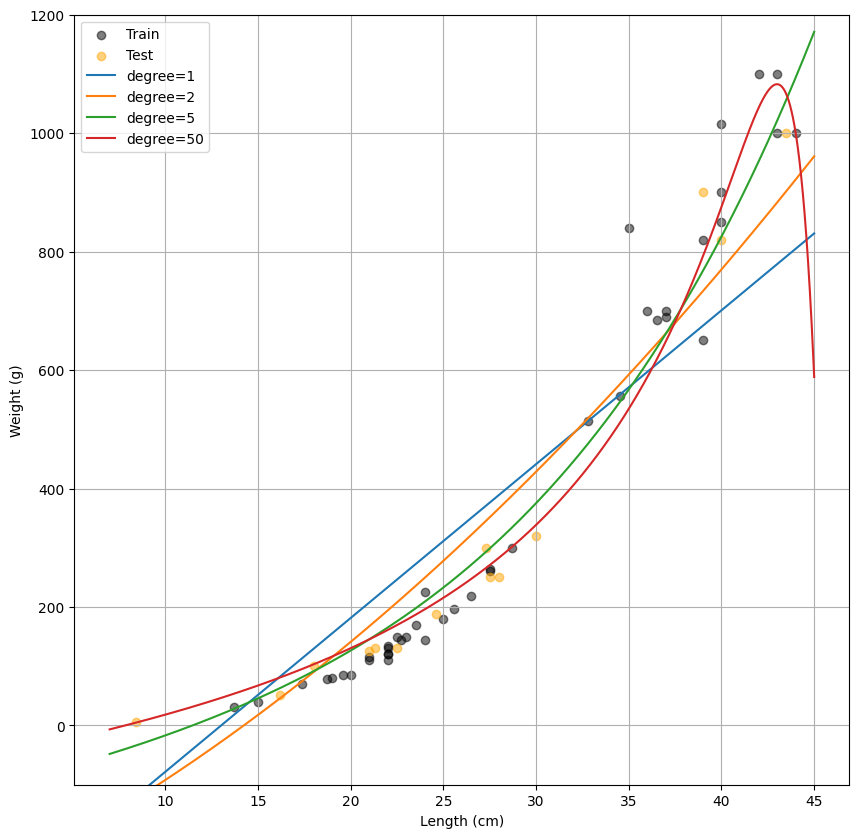

In [81]:
visualize_regression(X_train, y_train, X_test, y_test, degrees, ElasticNet())   # 되도록 과소적합은 피하는 것이 좋음.

# 하이퍼파라미터(Hyper-parameter) 튜닝

* 모델 파라미터(model parameter) : 머신 러닝 알고리즘에서 만들어진 수학적인 모델의 비용함수를 최소화하도록 만드는 파라미터들. 머신 러닝에서 스스로 찾아내는 값들.
* 하이퍼파라미터(hyper-parameter) : 머신 러닝 알고리즘에서 개발자가 바꿔가면서 테스트하는 파라미터들.
    * PolynomialFeatures의 degree
    * 규제(L2, L1, ElasticNet)에서 alpha
    * KNN 알고리즘 k

# 규제 크기(alpha)에 따른 결정계수(R2 score) 변화

* 특성 : Length, Diagonal, Height, Width, 레이블 : Weight
* Ridge, degree=5, StandardScaler, alpha=(0.001, 0.01, 0.1, 1.0, 10, 100), 훈련/테스트 셋 R2 score 계산
* Lasso, ""
* ElasticNet, ""

In [82]:
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values

In [83]:
y = perch['Weight'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Ridge

In [94]:
degree = 5
estimator = Ridge
alpha = (0.001, 0.01, 0.1, 1.0, 10, 100)

In [95]:
def Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator):
    # train_score = []
    # test_score = []
    # for a in alpha:
    #     pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    #                            ('scaler', StandardScaler()),
    #                            ('reg', estimator(alpha=a))])
    #     pipe.fit(X_train, y_train)  # training
    #     train_pred = pipe.predict(X_train)
    #     test_pred = pipe.predict(X_test)
    #     print(f'---{a}--- {r2_score(y_train, train_pred)}(Train) / {r2_score(y_test, test_pred)}(Test)')
    #     train_score.append(pipe.score(X_train, y_train))
    #     test_score.append(pipe.score(X_test, y_test))

        plt.plot(alpha, train_score, label=f'{a}')      # 안쪽이 아니라 바깥에서 실행!!
        # plt.plot(a, test_score, label=f'{a}')
        # plt.plot(x_vals, y_vals, label=f'{a}')

    # plt.grid()
    # plt.legend()
    # plt.ylim((-10, 10))
    # plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

def Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator):
    alpha = [0.001, 0.01, 0.1, 1.0, 10, 100]
    train_score = []
    test_score = []

    for a in alpha:
        pipe = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('reg', estimator(alpha=a))
        ])
        pipe.fit(X_train, y_train)

        train_pred = pipe.predict(X_train)
        test_pred = pipe.predict(X_test)

        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        print(f'--- α={a} --- R²(Train): {r2_train:.4f} / R²(Test): {r2_test:.4f}')

        train_score.append(r2_train)
        test_score.append(r2_test)

    # 📊 시각화 (루프 바깥에서 한 번만 실행!)
    plt.figure(figsize=(8, 5))
    plt.plot(alpha, train_score, marker='o', label='Train R²')
    plt.plot(alpha, test_score, marker='v', label='Test R²')
    plt.xscale('log')  # 로그 스케일이 alpha 비교에 적합
    plt.xlabel('Alpha')
    plt.ylabel('R² Score')
    plt.title(f'Ridge Regression R² vs Alpha (degree={degree})')
    plt.grid(True)
    plt.legend()
    # plt.ylim(-1, 1)
    plt.show()


--- α=0.001 --- R²(Train): 0.9947 / R²(Test): 0.8806
--- α=0.01 --- R²(Train): 0.9927 / R²(Test): 0.9676
--- α=0.1 --- R²(Train): 0.9907 / R²(Test): 0.9830
--- α=1.0 --- R²(Train): 0.9899 / R²(Test): 0.9806
--- α=10 --- R²(Train): 0.9891 / R²(Test): 0.9749
--- α=100 --- R²(Train): 0.9847 / R²(Test): 0.9620


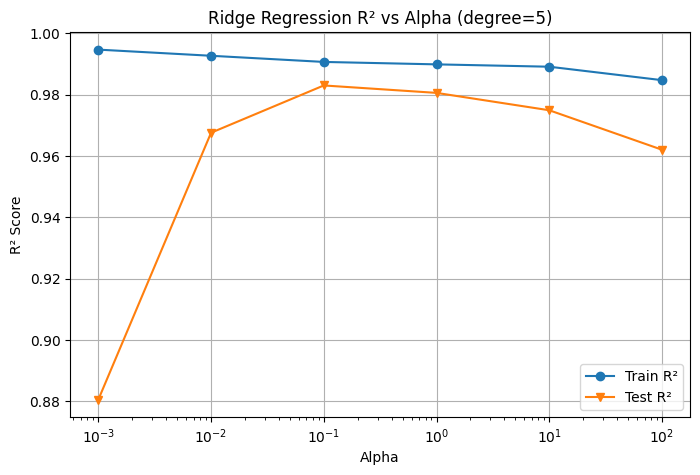

In [89]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

## Lasso

In [90]:
estimator = Lasso

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.183e

--- α=0.001 --- R²(Train): 0.9913 / R²(Test): 0.9825
--- α=0.01 --- R²(Train): 0.9912 / R²(Test): 0.9828
--- α=0.1 --- R²(Train): 0.9902 / R²(Test): 0.9822
--- α=1.0 --- R²(Train): 0.9898 / R²(Test): 0.9801
--- α=10 --- R²(Train): 0.9888 / R²(Test): 0.9825
--- α=100 --- R²(Train): 0.9079 / R²(Test): 0.9093


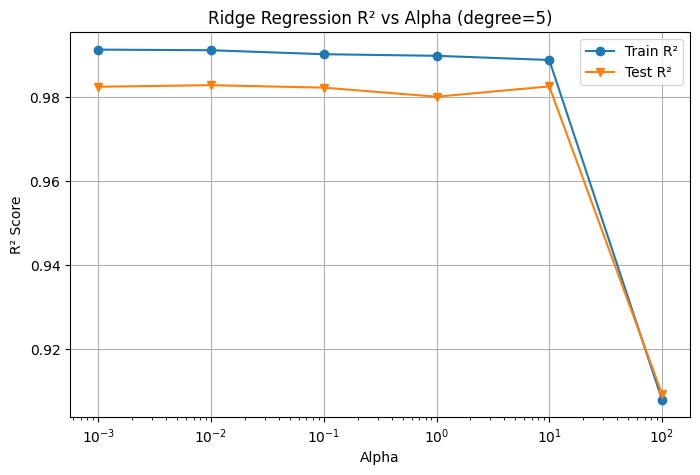

In [91]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

## ElasticNet

In [92]:
estimator = ElasticNet

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 5.183e

--- α=0.001 --- R²(Train): 0.9912 / R²(Test): 0.9829
--- α=0.01 --- R²(Train): 0.9903 / R²(Test): 0.9826
--- α=0.1 --- R²(Train): 0.9897 / R²(Test): 0.9793
--- α=1.0 --- R²(Train): 0.9884 / R²(Test): 0.9720
--- α=10 --- R²(Train): 0.9807 / R²(Test): 0.9616
--- α=100 --- R²(Train): 0.8298 / R²(Test): 0.8422


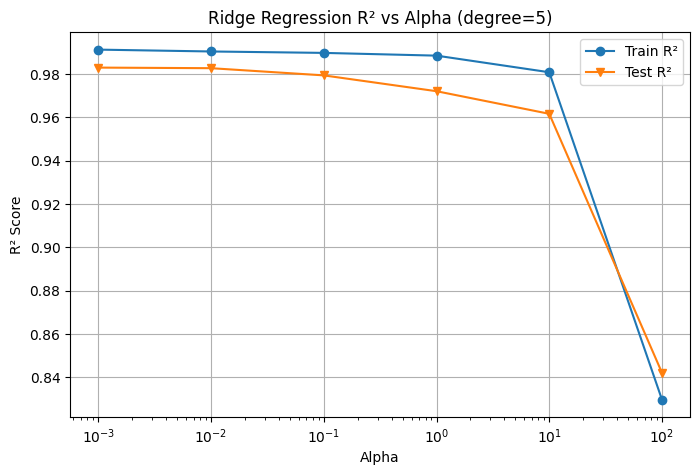

In [93]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

In [101]:
X = perch[perch.columns[2:]].values
y = perch['Weight'].values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
def visualize_r2_score(X_tr, y_tr, X_te, y_te, estimator, alphas):
    train_scores = []   # 규제 크기(alpha)에 따른 훈련 셋의 결정 계수를 저장할 리스트
    test_scores = []    # 규제 크기(alpha)에 따른 테스트 셋의 결정 계수를 저장할 리스트
    for a in alphas:
        if estimator == 'l1':
            reg = Lasso(alpha=a)
        elif estimator == 'l2':
            reg = Ridge(alpha=a)
        elif estimator == 'elastic':
            reg = ElasticNet(alpha=a)
        else:
            raise ValueError('estimator는 "l1", "l2", 또는 "elastic"이어야 함.')

        pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('reg', reg)])

        pipe.fit(X_tr, y_tr)

        train_r2 = pipe.score(X_tr, y_tr)
        train_scores.append(train_r2)                   # train_scores와 test_scres에 값을 계속 저장함
        test_r2 = pipe.score(X_te, y_te)                # 여기에는 alphas의 값 즉 0.001, 0.01, 0.1, 1.0, 10, 100의 값들이 전부 포함됨.
        test_scores.append(test_r2)

        print(f'alpha={a}: train({train_r2:.3f}) / est({test_r2:.3f})')

    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train $r^2$')    # x의 간격이 일정하지 않아서 log를 사용해 간격을 일정하게 만듦.
    plt.plot(np.log10(alphas), test_scores, 'r^:', label='test $r^2$')      # 1 : n의 관계가 아니라 1:1로 매핑됨.
    plt.legend()
    plt.grid()
    plt.xlabel('alpha (log scale)')
    plt.ylabel('$r^2$ score')
    plt.show()

alpha=0.001: train(0.995) / est(0.881)
alpha=0.01: train(0.993) / est(0.968)
alpha=0.1: train(0.991) / est(0.983)
alpha=1: train(0.990) / est(0.981)
alpha=10: train(0.989) / est(0.975)
alpha=100: train(0.985) / est(0.962)


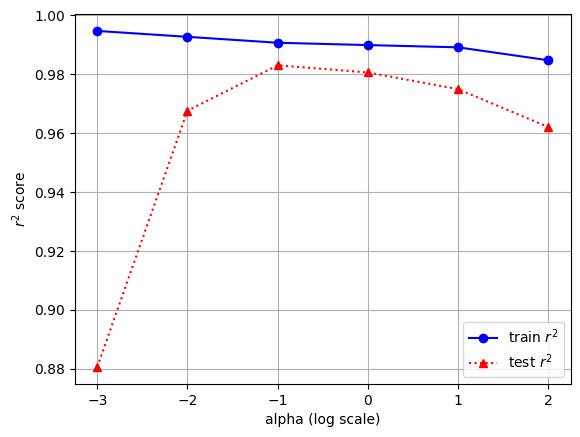

In [116]:
# Ridge
# alphas = (0.001, 0.01, 0.1, 1.0, 10, 100)
alphas = [10 ** x for x in range(-3, 3)]
visualize_r2_score(X_train, y_train, X_test, y_test, 'l2', alphas)

alpha=0.001: train(0.991) / est(0.982)
alpha=0.01: train(0.991) / est(0.983)
alpha=0.1: train(0.990) / est(0.982)
alpha=1: train(0.990) / est(0.980)
alpha=10: train(0.989) / est(0.983)
alpha=100: train(0.908) / est(0.909)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.183e

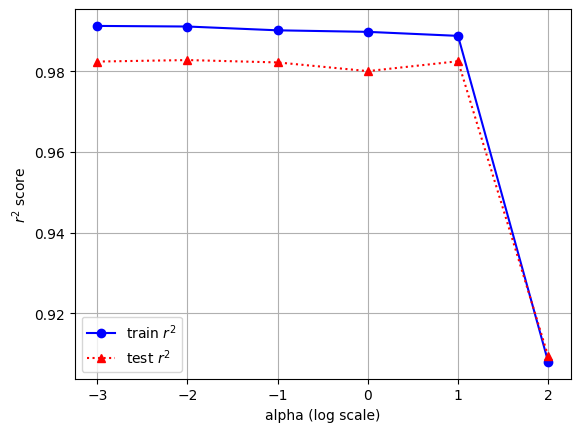

In [117]:
# Lasso
visualize_r2_score(X_train, y_train, X_test, y_test, 'l1', alphas)   # 과대적합

alpha=0.001: train(0.991) / est(0.983)
alpha=0.01: train(0.990) / est(0.983)
alpha=0.1: train(0.990) / est(0.979)
alpha=1: train(0.988) / est(0.972)
alpha=10: train(0.981) / est(0.962)
alpha=100: train(0.830) / est(0.842)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 5.183e

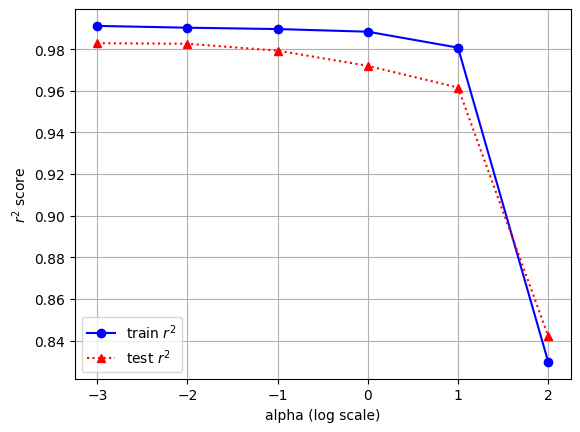

In [118]:
# ElasticNet
visualize_r2_score(X_train, y_train, X_test, y_test, 'elastic', alphas)